# 10장 딥러닝 모델 설계하기  (2장 딥러닝의 핵심 미리 보기)

[<img src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" align="left"/> ](https://colab.research.google.com/github/taehojo/deeplearning/blob/master/colab/ch10-colab.ipynb)

### 1. 환경 준비 

In [1]:
# 텐서플로 라이브러리 안에 있는 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense   

# 데이터를 다루는 데 필요한 라이브러리를 불러옵니다.
import numpy as np

### 2. 데이터 준비

In [2]:
# 준비된 수술 환자 데이터를 불러옵니다.
Data_set = np.loadtxt("C:/dev/MLDL/모두의딥러닝_3판/data/ThoraricSurgery3.csv", delimiter=",")  
X = Data_set[:,0:16]    # 환자의 진찰 기록을 X로 지정합니다.
y = Data_set[:,16]      # 수술 1년 후 사망/생존 여부를 y로 지정합니다.

### 3. 구조 결정 

In [3]:
# 딥러닝 모델의 구조를 결정합니다.
model = Sequential()                                                   
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### 4. 모델 실행 

In [4]:
# 딥러닝 모델을 실행합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                510       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [5]:
history=model.fit(X, y, epochs=5, batch_size=16)

Epoch 1/5
30/30 [==============================] - 1s 2ms/step - loss: 1.0085 - accuracy: 0.8426 
Epoch 2/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4765 - accuracy: 0.8298
Epoch 3/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4111 - accuracy: 0.8511
Epoch 4/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8511
Epoch 5/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4116 - accuracy: 0.8511


In [6]:
type(history)

keras.callbacks.History

In [7]:
help(history)

Help on History in module keras.callbacks object:

class History(Callback)
 |  Callback that records events into a `History` object.
 |  
 |  This callback is automatically applied to
 |  every Keras model. The `History` object
 |  gets returned by the `fit` method of models.
 |  
 |  Example:
 |  
 |  >>> model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
 |  >>> model.compile(tf.keras.optimizers.SGD(), loss='mse')
 |  >>> history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
 |  ...                     epochs=10, verbose=1)
 |  >>> print(history.params)
 |  {'verbose': 1, 'epochs': 10, 'steps': 1}
 |  >>> # check the keys of history object
 |  >>> print(history.history.keys())
 |  dict_keys(['loss'])
 |  
 |  Method resolution order:
 |      History
 |      Callback
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  on_epoch_end(self, epoch, logs=None)
 |

In [8]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_implements_predict_batch_hooks',
 '_implements_test_batch_hooks',
 '_implements_train_batch_hooks',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_supports_tf_logs',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [9]:
history.history

{'loss': [1.0084524154663086,
  0.4765079915523529,
  0.4110754430294037,
  0.409883052110672,
  0.4115719795227051],
 'accuracy': [0.8425531983375549,
  0.8297872543334961,
  0.8510638475418091,
  0.8510638475418091,
  0.8510638475418091]}

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

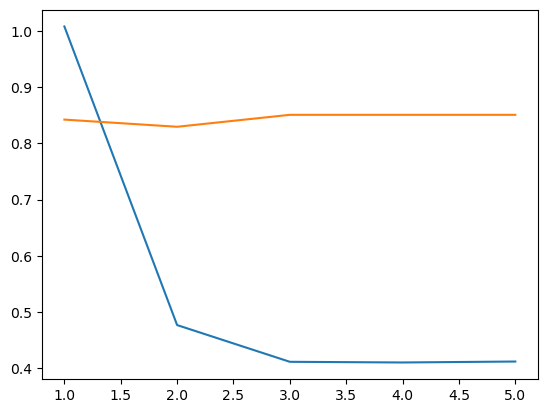

In [22]:
x = [1, 2, 3, 4, 5]
plt.plot(x, [history.history['loss'],history.history['accuracy']])
plt.show()